In [36]:
import numpy as np
import matplotlib.pyplot as plt

## Задача

Решите задачу Коши для ОДУ методом Рунге-Кутты четвертого порядка.

$$ \frac{d^2 u}{dt^2} = -\sin{(u)},\ 0<t<4\pi $$

$$ u(0) = 1,\ \frac{du}{dt}(0)=0 $$

Используем явный метод Рунге-Кутты 4-ого порядка 

$$ k_1 = f(x_n, y_n) $$

$$ k_2 = f(x_n + \frac{h}{2}, y_n + h\frac{k_1}{2}) $$

$$ k_3 = f(x_n + \frac{h}{2}, y_n + h\frac{k_2}{2}) $$

$$ k_4 = f(x_n + h, y_n + hk_3) $$

$$ y_{n+1} = y_n + \frac{h}{6} ( k_1 + 2k_2 + 2k_3 + k_4 )  $$

При приближенном решении уравнения второго порядка сначала переходим от одного уравнения к системе из двух

$$ \frac{du_1}{dt} = u_2 $$

$$ \frac{du_2}{dt} = -\sin{(u_1)} $$

In [37]:
def k( f, t, u, tau ):
    
    k = np.zeros( ( 4, 2 ) )
    
    k[ 0 ] = f( t, u )
    
    for i in np.arange( 1, 3, 1 ):
        
        k[ i ] = f( t + tau / 2., u + tau * k[ i - 1 ] / 2 )
        
    k[ -1 ] = f( t + tau, u + tau * k[ -2 ] )
    
    return k

def RungeKutta( f, t0, u0, tend, tau ):
    
    global k
    
    t = np.arange( t0, tend, tau )
    
    u = np.zeros( ( t.shape[ 0 ], 2 )  )
    
    u[ 0 ] = u0
    
    for i in np.arange( 1, t.shape[ 0 ], 1 ):
        
        kk = k( f, t[ i - 1 ], u[ i - 1 ], tau )
        
        C = tau / 6. * ( kk[ 0 ] + 2.0 * kk[ 1 ] + 2.0 * kk[ 2 ] + kk[ 3 ] )
        
        u[ i ] = u[ i - 1 ] + C
        
    return u, t
    

In [38]:
def fun( t, u ):
    
    f = np.zeros( 2 )
    
    f[ 0 ] = u[ 1 ]
    
    f[ 1 ] = - np.sin( u[ 0 ] )
    
    return f

In [39]:
t0 = 0.0

tEND = 4. * np.pi

u0 = np.asarray( [ 1., 0. ] )

tau = 0.01

u, t = RungeKutta( fun, t0, u0, tEND, tau )

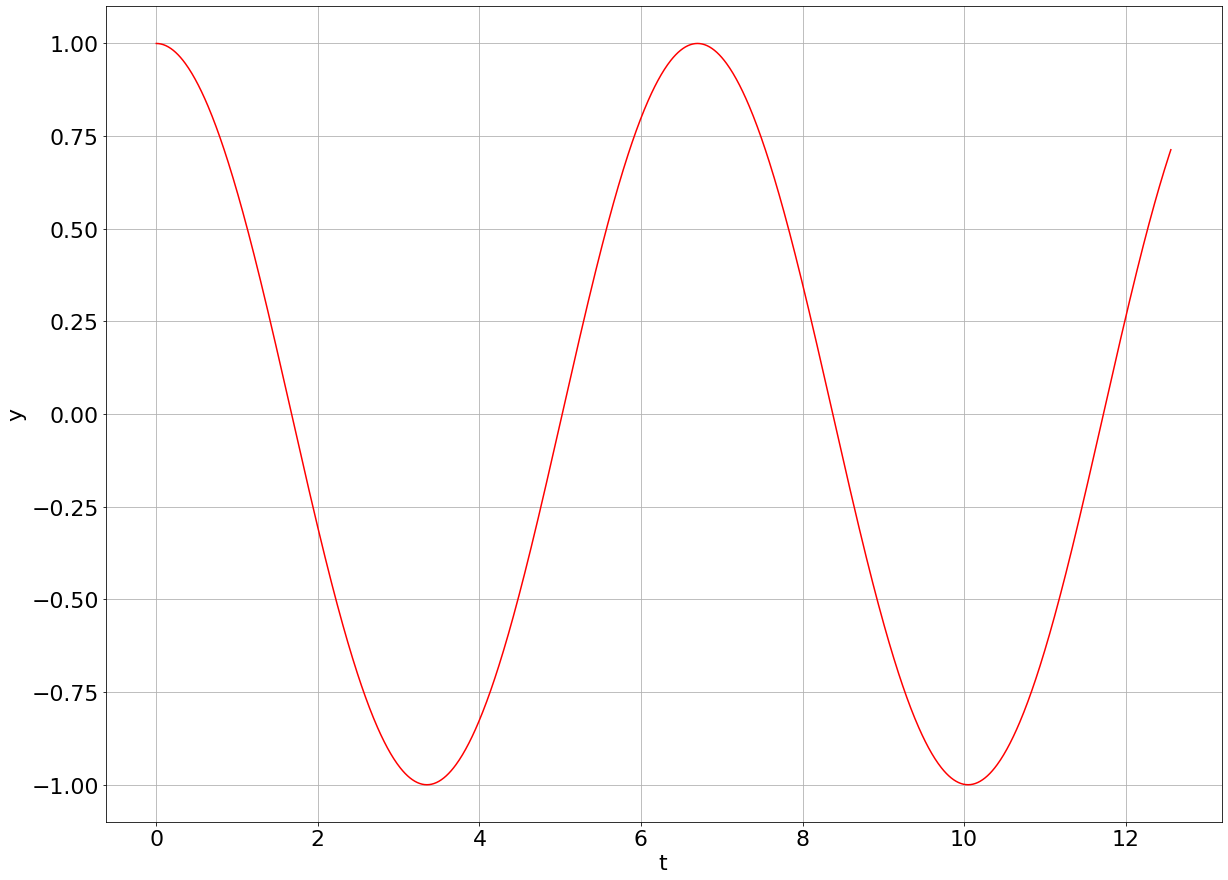

In [53]:
plt.figure( figsize = ( 20, 15 ) )
plt.grid()
plt.rc('font', **{'size' : 22})
plt.xlabel( ' t ' )
plt.ylabel( ' y ' )

plt.plot( t, u[:, 0], 'r-' )